Import Libraries

In [ ]:
%pip install numpy
%pip install qiskit[visualization]==1.0.2
%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install matplotlib
%pip install pylatexenc
%pip install ldpc
%pip install qiskit-transpiler-service
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git --ignore-requires-python
import qiskit
qiskit.__version__

  Using cached qiskit-1.0.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached qiskit-1.0.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.6 MB)
  Attempting uninstall: qiskit
    Found existing installation: qiskit 1.2.0
    Uninstalling qiskit-1.2.0:
      Successfully uninstalled qiskit-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-ibm-runtime 0.28.0 requires qiskit>=1.1.0, but you have qiskit 1.0.2 which is incompatible.
  Using cached qiskit-1.2.0-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached qiskit-1.2.0-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.8 MB)
  Attempting uninstall: qiskit
    Found existing installation: qiskit 1.0.2
    Uninstalling qiskit-1.0.2:
      Successfully uninstalled qiskit-1.0.2
  Cloning https://github.com/qiski

'1.2.0'

# Normal ECC

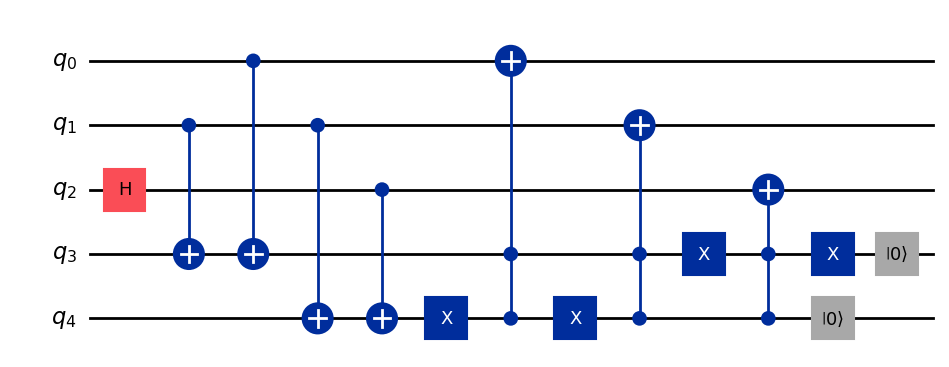

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector


qreg_q = QuantumRegister(5, 'q')
circuit = QuantumCircuit(qreg_q)

#induced error
circuit.h(qreg_q[2])


circuit.cx(qreg_q[1], qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[1], qreg_q[4])
circuit.cx(qreg_q[2], qreg_q[4])
circuit.x(qreg_q[4])
circuit.ccx(qreg_q[3], qreg_q[4], qreg_q[0])
circuit.x(qreg_q[4])
circuit.ccx(qreg_q[4], qreg_q[3], qreg_q[1])
circuit.x(qreg_q[3])
circuit.ccx(qreg_q[4], qreg_q[3], qreg_q[2])
circuit.x(qreg_q[3])
circuit.reset(qreg_q[3])
circuit.reset(qreg_q[4])
circuit.draw("mpl")


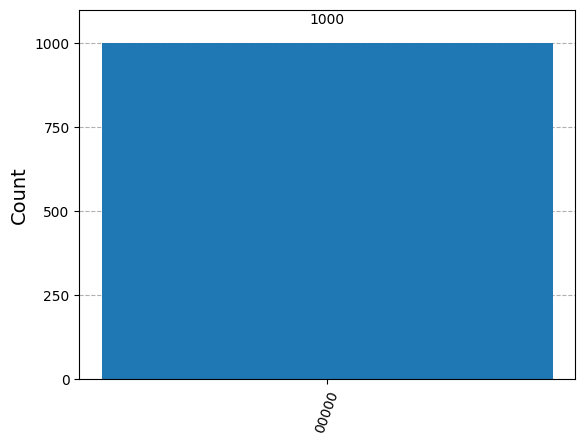

In [ ]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
circuit.measure_all()
backend = BasicSimulator()

# If you do not specify the number of shots, the default is 1024
result = backend.run(circuit, shots=1000).result()

# Extract the counts of 0 and 1 measurements
counts = result.get_counts()
plot_histogram(counts)

#4 2 2 Encoder

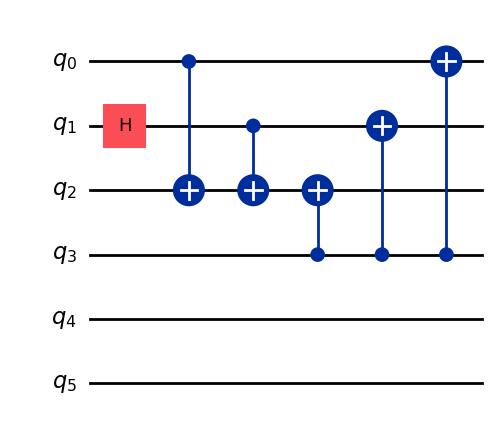

In [ ]:
def Encode422(qc):
  qc.h(1)
  qc.cx(0,2)
  qc.cx(1,2)
  qc.cx(3,2)
  qc.cx(3,1)
  qc.cx(3,0)

sample = QuantumCircuit(6)
Encode422(sample)
sample.draw("mpl")

# Bit Flip Parity

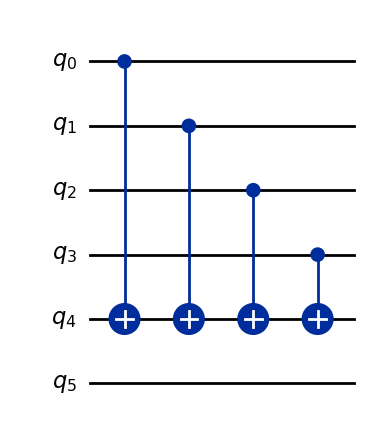

In [ ]:
def BitParity422(qc):
  qc.cx(0,4)
  qc.cx(1,4)
  qc.cx(2,4)
  qc.cx(3,4)

sample = QuantumCircuit(6)
BitParity422(sample)
sample.draw("mpl")

# Phase Flip Parity

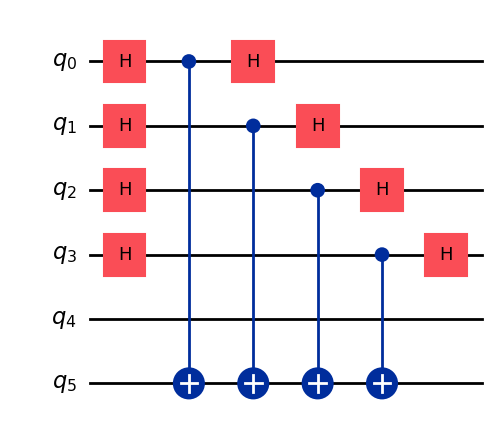

In [ ]:
def PhaseParity422(qc):
  qc.h(0)
  qc.h(1)
  qc.h(2)
  qc.h(3)
  qc.cx(0,5)
  qc.cx(1,5)
  qc.cx(2,5)
  qc.cx(3,5)
  qc.h(0)
  qc.h(1)
  qc.h(2)
  qc.h(3)

sample = QuantumCircuit(6)
PhaseParity422(sample)
sample.draw("mpl")

We can now combine these to measure the parity of a [4 2 2] code, as follows:

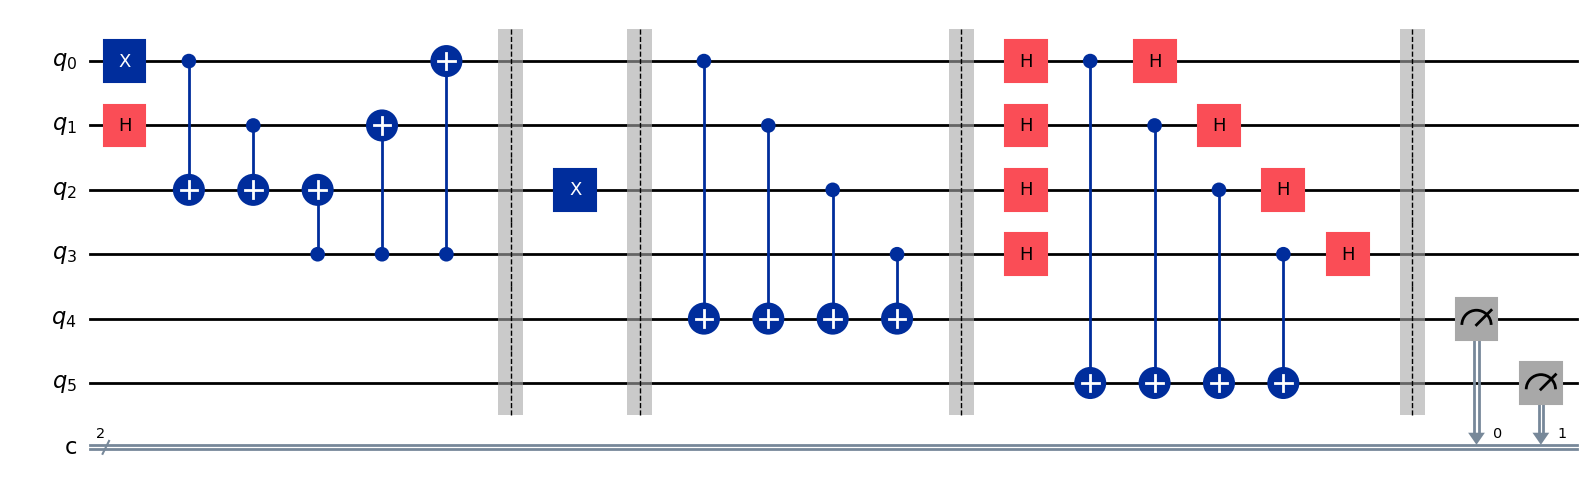

In [ ]:
full = QuantumCircuit(6,2)
full.x(0)

Encode422(full)
# ERROR APPLY
full.barrier()
full.x(2)
full.barrier()
BitParity422(full)
full.barrier()
PhaseParity422(full)
full.barrier()
full.measure(4,0)
full.measure(5,1)
full.draw("mpl")

We are encoding the state |01> here, encoding it, performing some error, and then measuring its parities.

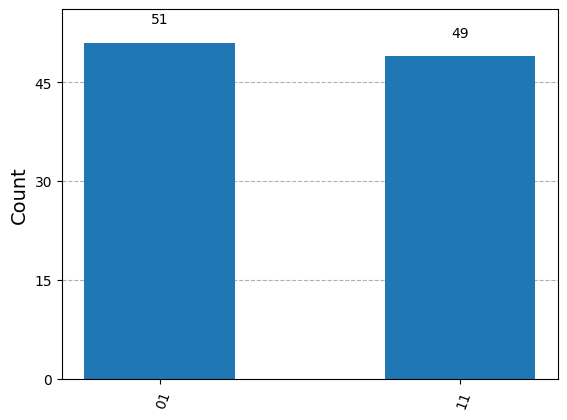

In [ ]:
backend = BasicSimulator()

# If you do not specify the number of shots, the default is 1024
result = backend.run(full, shots=100).result()

# Extract the counts of 0 and 1 measurements
counts = result.get_counts()
plot_histogram(counts)

In our example our parity are measuring with bit flip error of 1 and phase flip error of 0 or 1 (toss up). As such, we are certain a bit flip occured but we don't know about a phase flip error. A 422 code is the smallest code that can detect an arbitrary error, in this case we are certain that a BIT FLIP occurred, but it cannot correct any arbitrary bits (we don't know which of the four qubits to change).

What do we need to do next? We need to find a large enough code to run BP on. We have shown that our methods for detecting bit and phase errors work.

Here is an example of Shor code:

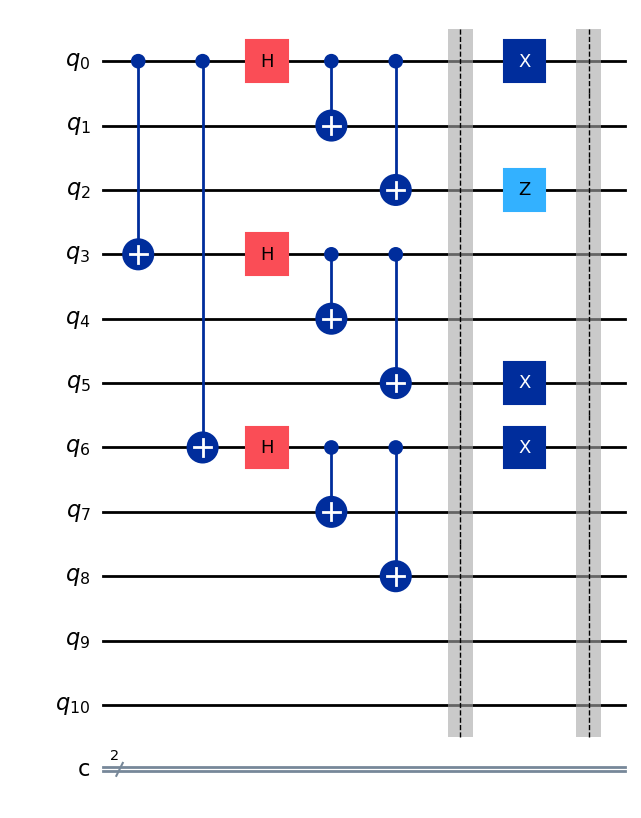

In [ ]:
q = QuantumRegister(11,'q')
c = ClassicalRegister(2,'c')

circuit = QuantumCircuit(q,c)

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.barrier(q)

# ERROR
circuit.x(q[0])
circuit.x(q[5])
circuit.x(q[6])
circuit.z(q[2])

circuit.barrier(q)
circuit.draw(output='mpl')

To perform error correction we first correct all parity and then correct phase, as follows:

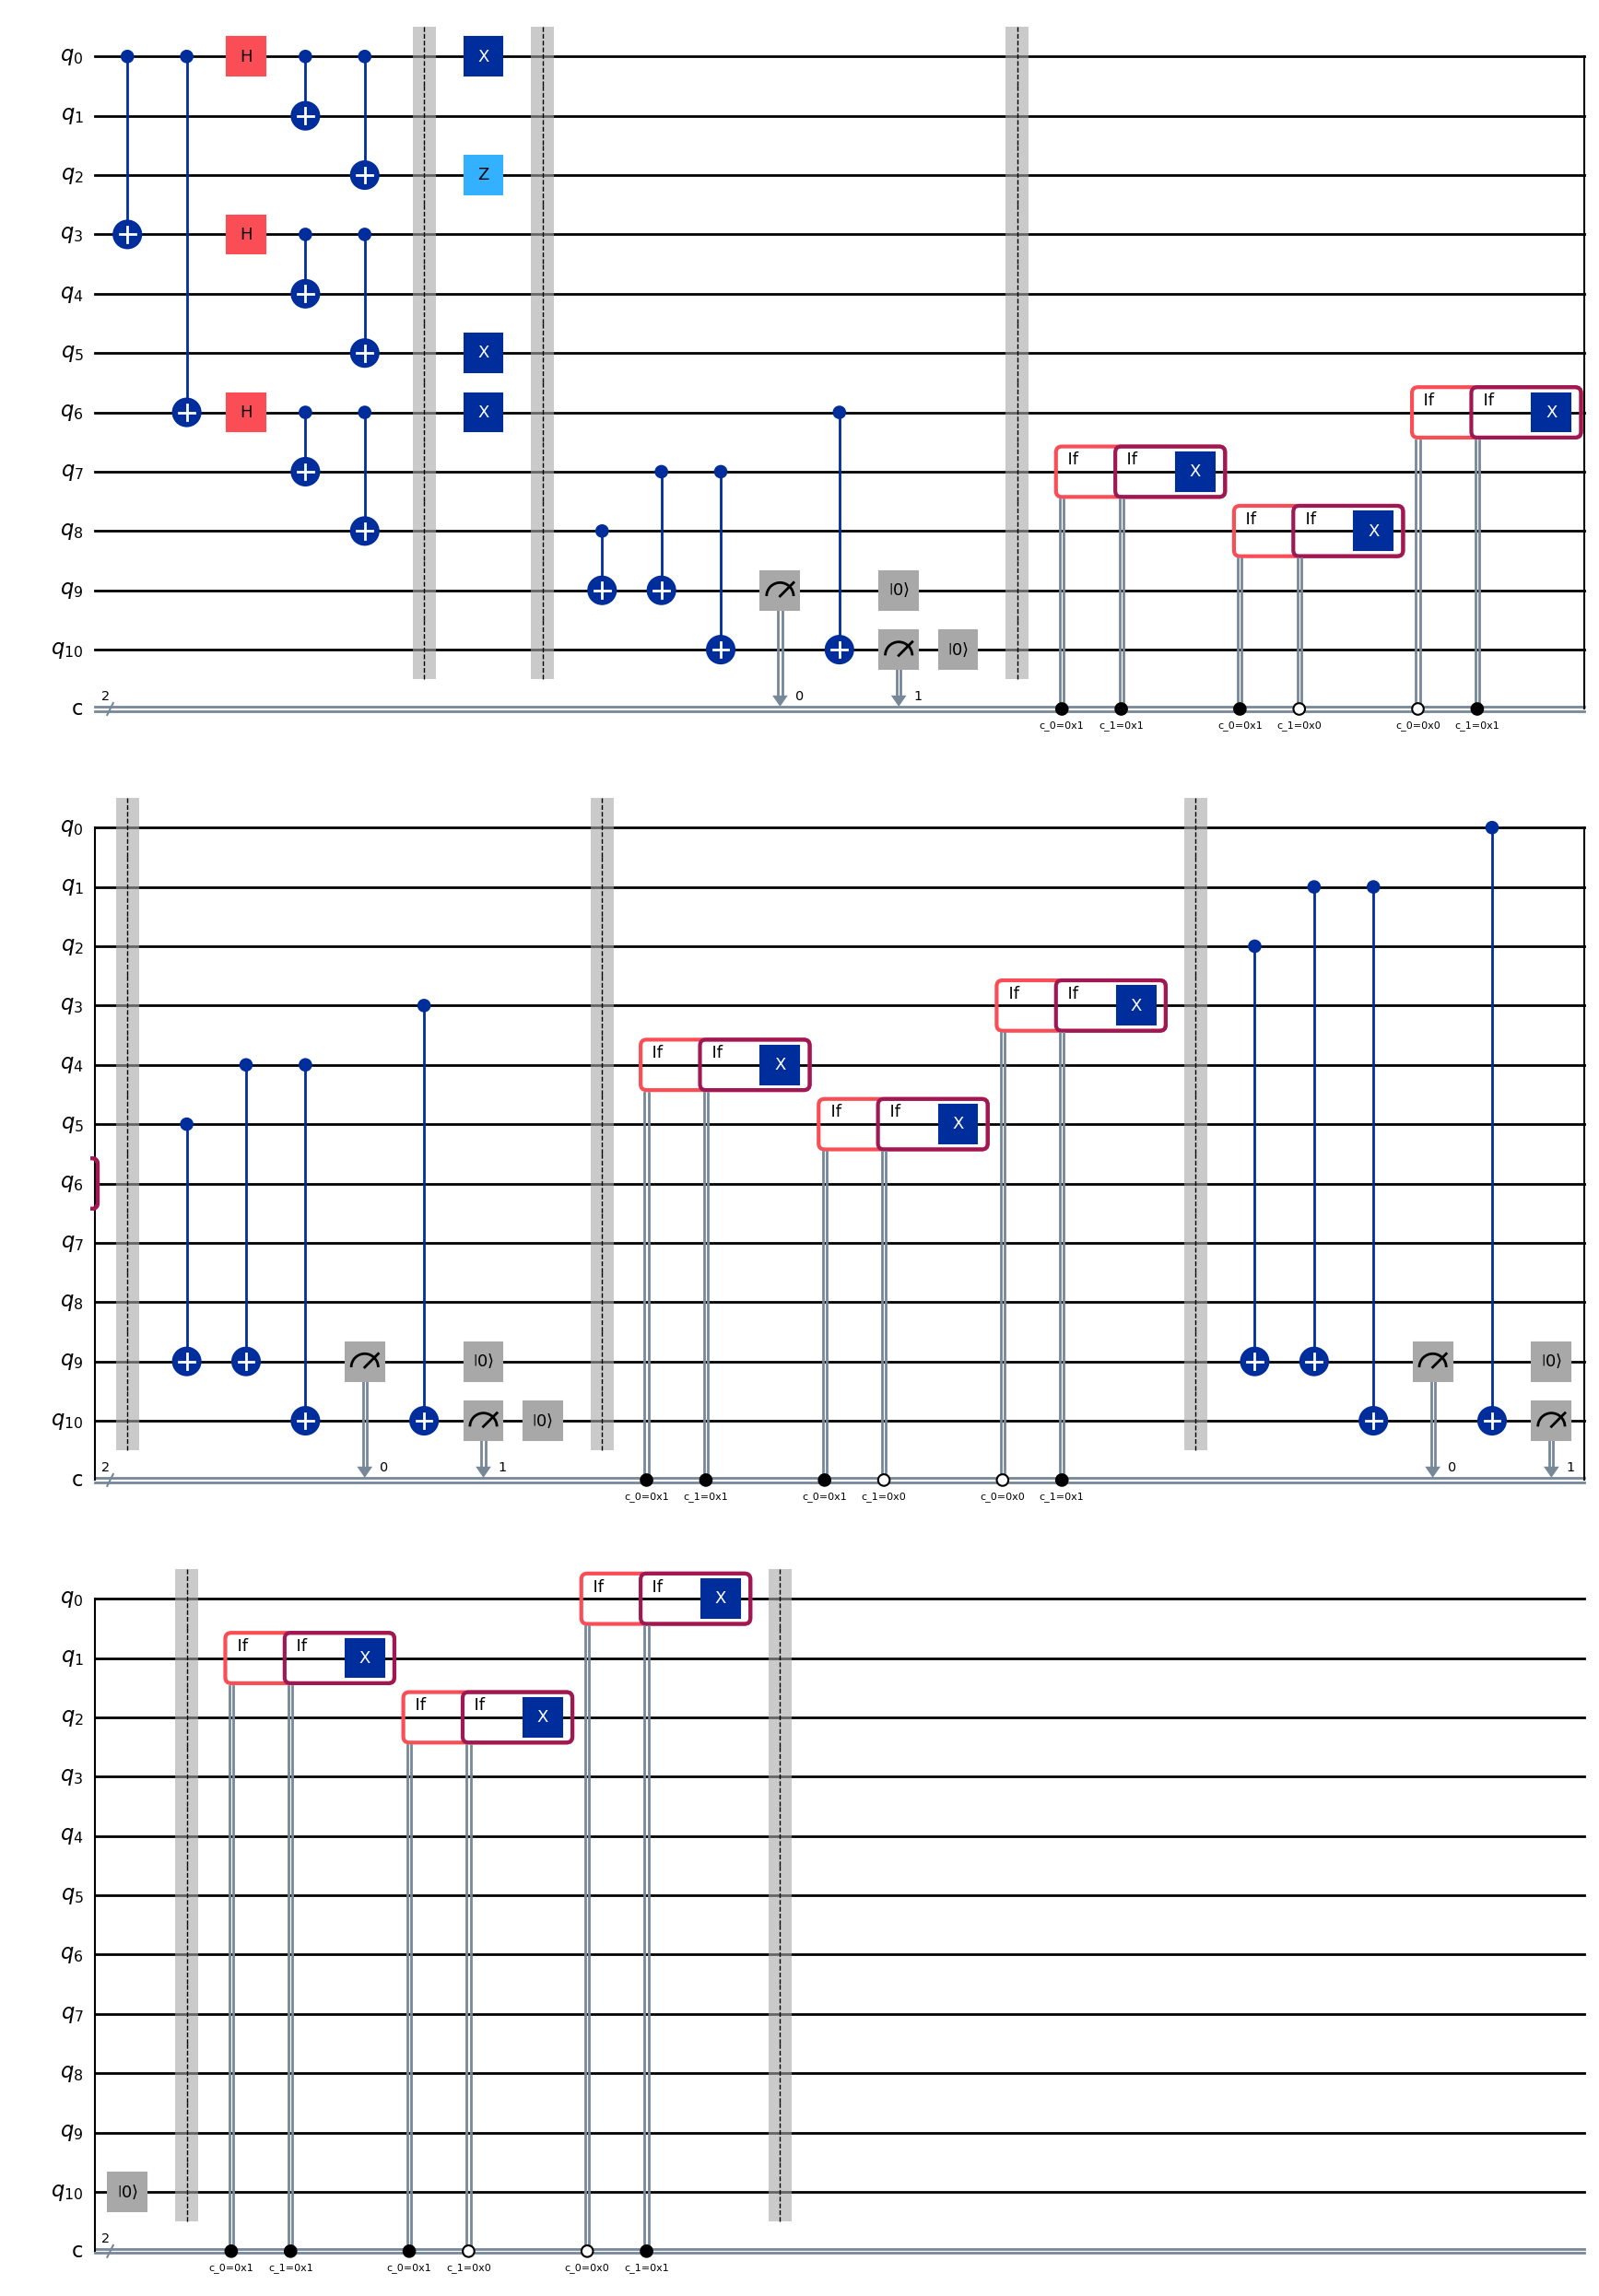

In [ ]:
# Correcting for bit flip errors
circuit.cx(q[8],q[9])
circuit.cx(q[7],q[9])
circuit.cx(q[7],q[10])
circuit.cx(q[6],q[10])
circuit.measure(q[9], c[0])
circuit.measure(q[10], c[1])
circuit.reset(q[9])
circuit.reset(q[10])
circuit.barrier()
# Apply if tests
with circuit.if_test((c[0],1)):
    with circuit.if_test((c[1],1)):
        circuit.x(q[7])
with circuit.if_test((c[0],1)):
    with circuit.if_test((c[1],0)):
        circuit.x(q[8])
with circuit.if_test((c[0],0)):
    with circuit.if_test((c[1],1)):
        circuit.x(q[6])

circuit.barrier()

circuit.cx(q[5],q[9])
circuit.cx(q[4],q[9])
circuit.cx(q[4],q[10])
circuit.cx(q[3],q[10])
circuit.measure(q[9], c[0])
circuit.measure(q[10], c[1])
circuit.reset(q[9])
circuit.reset(q[10])
circuit.barrier()
# Apply if tests
with circuit.if_test((c[0],1)):
    with circuit.if_test((c[1],1)):
        circuit.x(q[4])
with circuit.if_test((c[0],1)):
    with circuit.if_test((c[1],0)):
        circuit.x(q[5])
with circuit.if_test((c[0],0)):
    with circuit.if_test((c[1],1)):
        circuit.x(q[3])

circuit.barrier()

circuit.cx(q[2],q[9])
circuit.cx(q[1],q[9])
circuit.cx(q[1],q[10])
circuit.cx(q[0],q[10])
circuit.measure(q[9], c[0])
circuit.measure(q[10], c[1])
circuit.reset(q[9])
circuit.reset(q[10])
circuit.barrier()
# Apply if tests
with circuit.if_test((c[0],1)):
    with circuit.if_test((c[1],1)):
        circuit.x(q[1])
with circuit.if_test((c[0],1)):
    with circuit.if_test((c[1],0)):
        circuit.x(q[2])
with circuit.if_test((c[0],0)):
    with circuit.if_test((c[1],1)):
        circuit.x(q[0])

circuit.barrier()

circuit.draw("mpl")

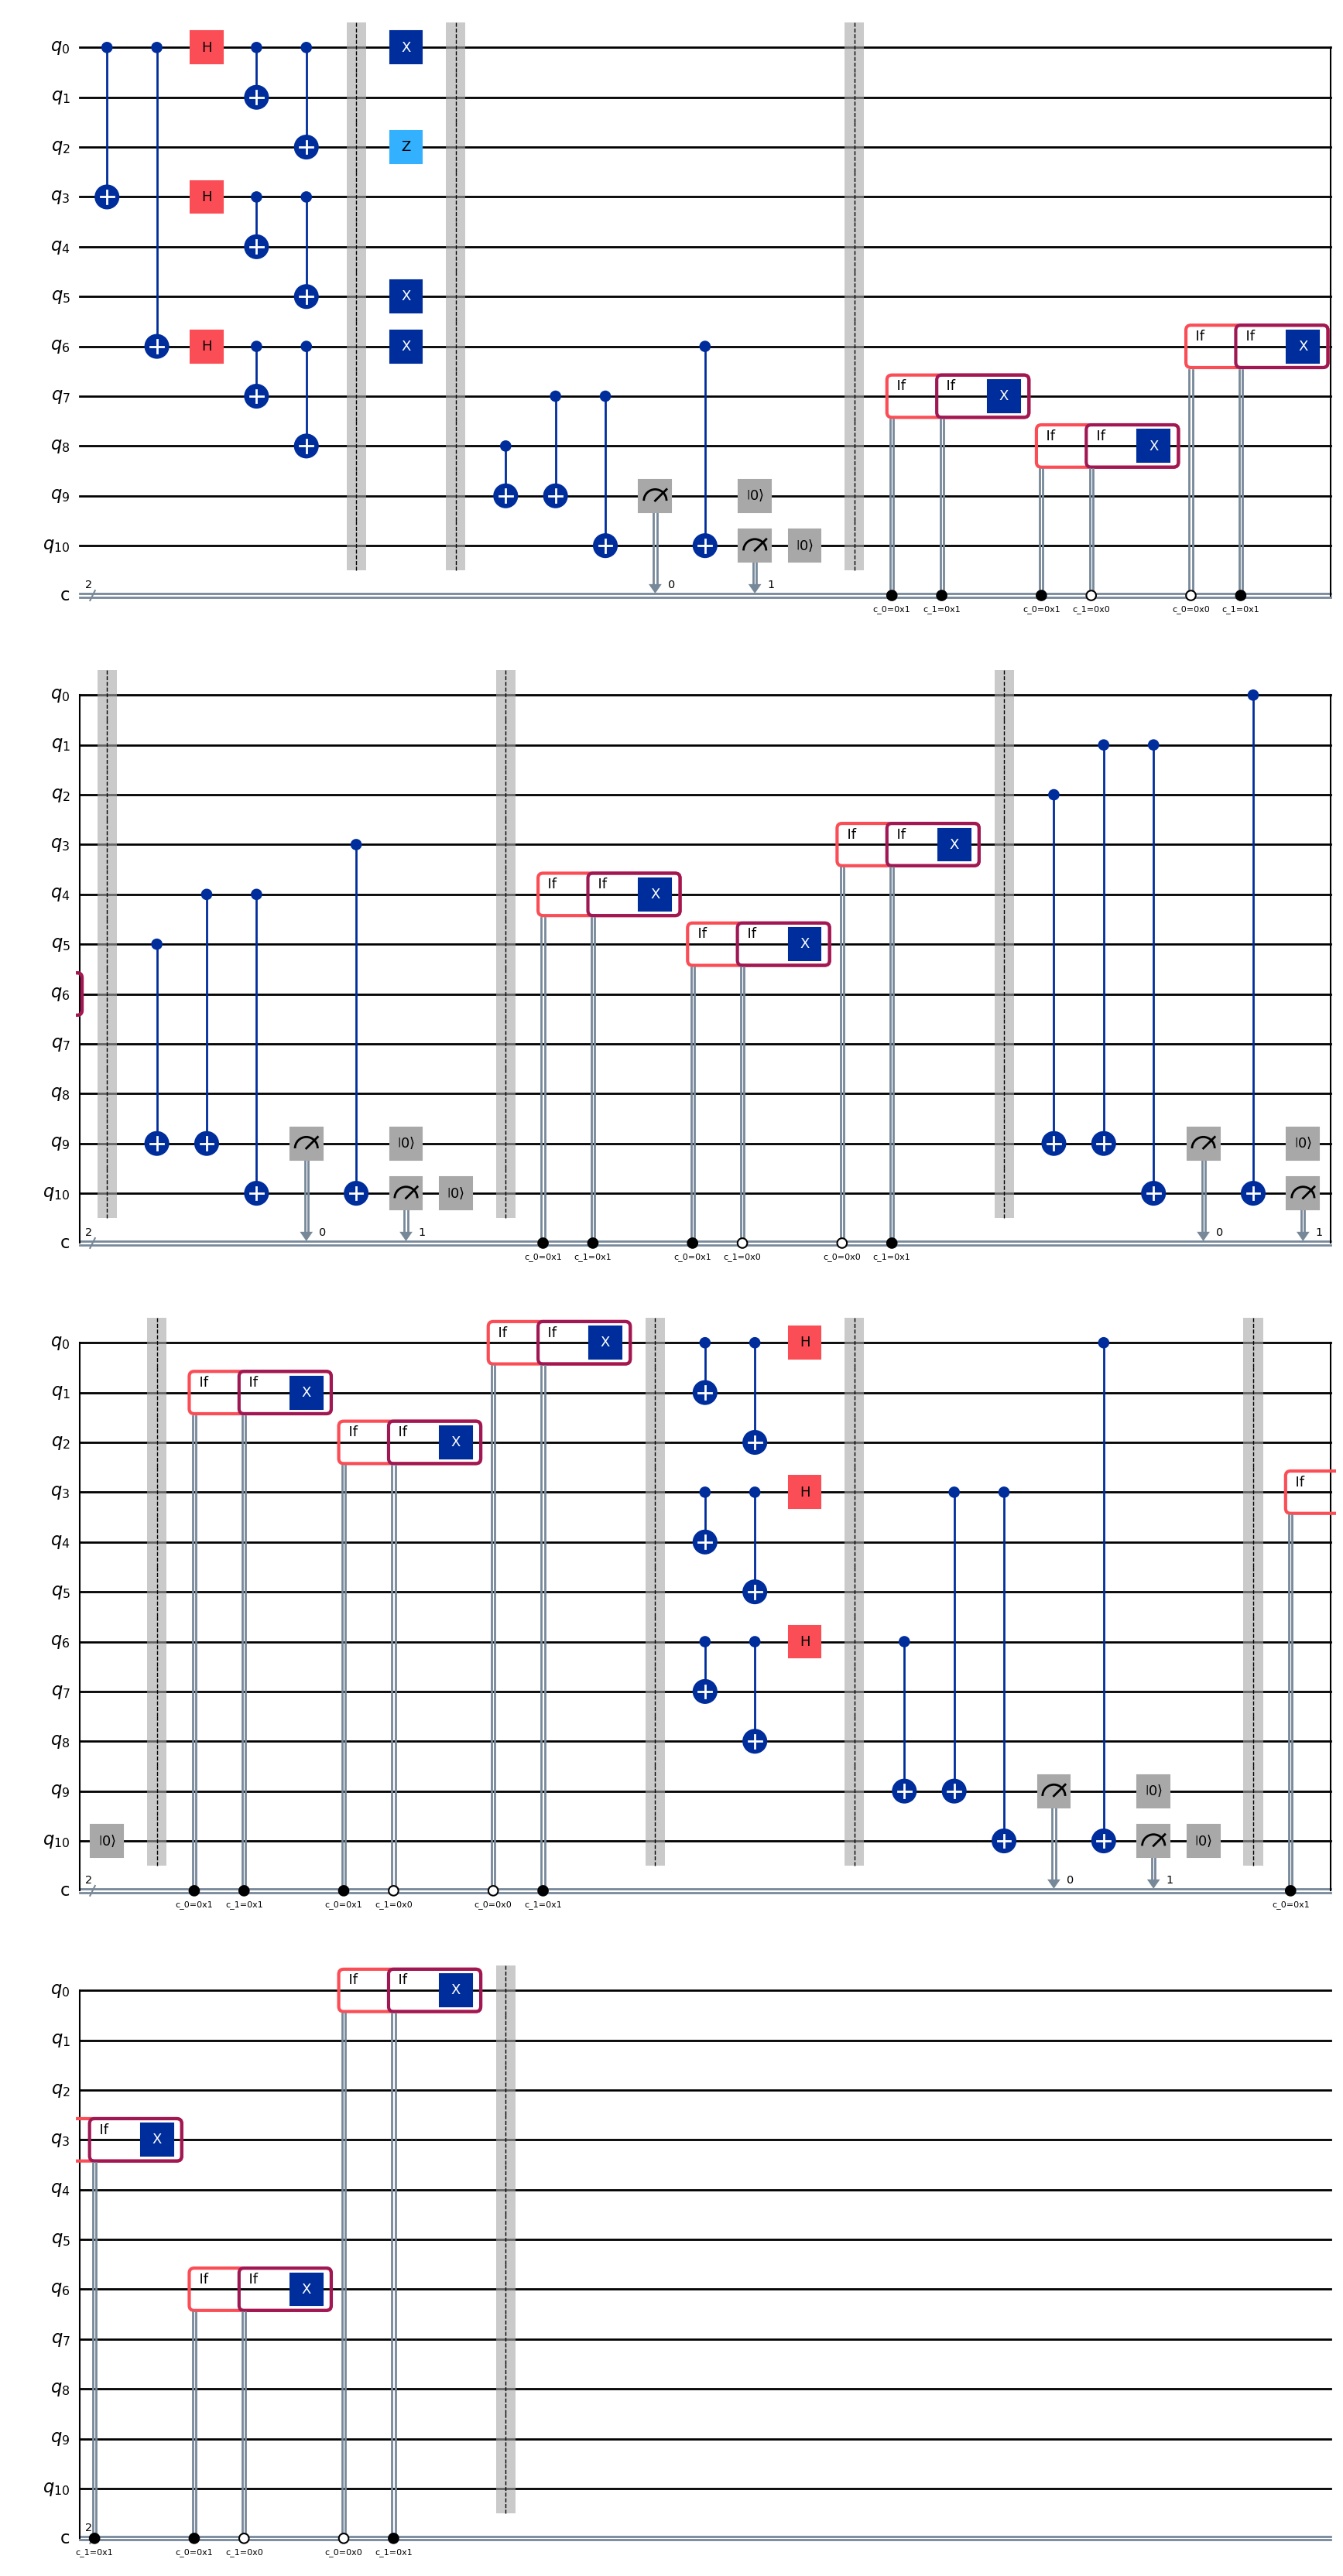

In [ ]:
# Correcting for phase flip
circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.barrier()

circuit.cx(q[6],q[9])
circuit.cx(q[3],q[9])
circuit.cx(q[3],q[10])
circuit.cx(q[0],q[10])
circuit.measure(q[9], c[0])
circuit.measure(q[10], c[1])
circuit.reset(q[9])
circuit.reset(q[10])
circuit.barrier()
# Apply if tests
with circuit.if_test((c[0],1)):
    with circuit.if_test((c[1],1)):
        circuit.x(q[3])
with circuit.if_test((c[0],1)):
    with circuit.if_test((c[1],0)):
        circuit.x(q[6])
with circuit.if_test((c[0],0)):
    with circuit.if_test((c[1],1)):
        circuit.x(q[0])


circuit.barrier()
circuit.draw("mpl")

We cannot measure with a simulator, we need to run them on the quantum computer itself. The following is an alternative version to the above.

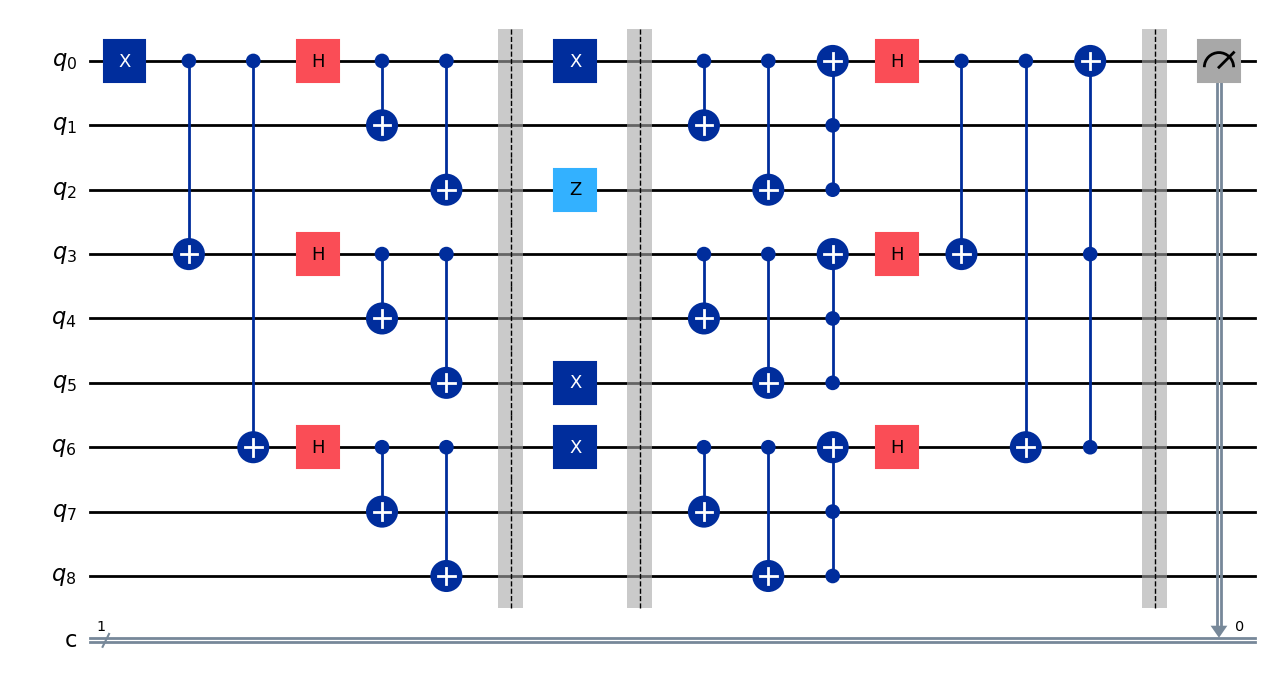

In [ ]:
q = QuantumRegister(9,'q')
c = ClassicalRegister(1,'c')

circuit = QuantumCircuit(q,c)
# Start with the state "1"
circuit.x(q[0])

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.barrier(q)

# ERROR
circuit.x(q[0])
circuit.x(q[5])
circuit.x(q[6])
circuit.z(q[2])

circuit.barrier(q)
circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.ccx(q[1],q[2],q[0])
circuit.ccx(q[4],q[5],q[3])
circuit.ccx(q[8],q[7],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])
circuit.ccx(q[6],q[3],q[0])

circuit.barrier(q)

circuit.measure(q[0],c[0])
circuit.draw("mpl")

# CITED FROM https://quantumcomputinguk.org/tutorials/quantum-error-correction-shor-code-in-qiskit

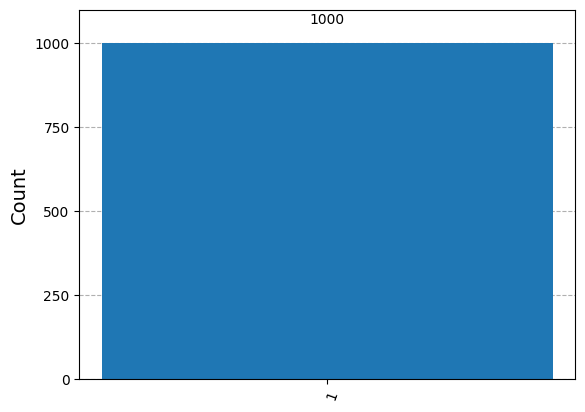

In [ ]:
backend = BasicSimulator()

# If you do not specify the number of shots, the default is 1024
result = backend.run(circuit, shots=1000).result()

# Extract the counts of 0 and 1 measurements
counts = result.get_counts()
plot_histogram(counts)

This section of the QisKit code shows a variety of steps in our research, including an understanding of the [4 2 2] code along with working circuits for its encoding and measuring bit flip and phase flip parity. We also showed that we understand how to create dynamic circuits with both classical operations (if) and quantum operations. These are important steps towards our final goal, where we will take these classical methods, perform classical calculations, and then cycle these solutions back into a quantum circuit.

We will now shift to decoding circuits using Belief Propagation and Ordered Statistic Decoding. We will begin with the above shor code's syndrome. Note that Shor Code is not a CSS Code. As such, we first need to perform corrections for bit flip error.

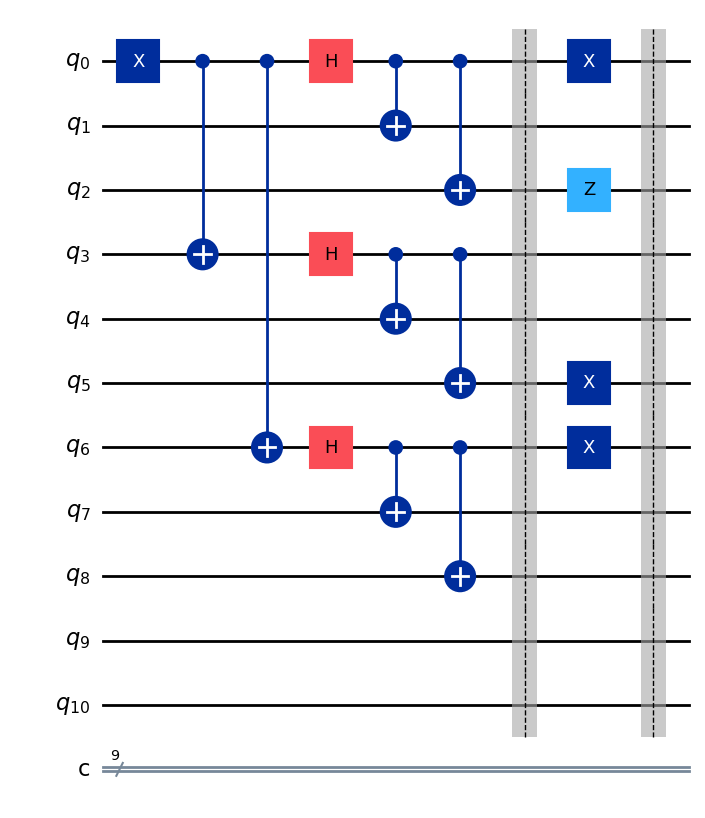

In [ ]:
q = QuantumRegister(11,'q')
c = ClassicalRegister(9,'c')

circuit = QuantumCircuit(q,c)

# Initial State of 1
circuit.x(q[0])

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.barrier(q)

# ERROR
circuit.x(q[0])
circuit.x(q[5])
circuit.x(q[6])
circuit.z(q[2])

circuit.barrier(q)
circuit.draw(output='mpl')

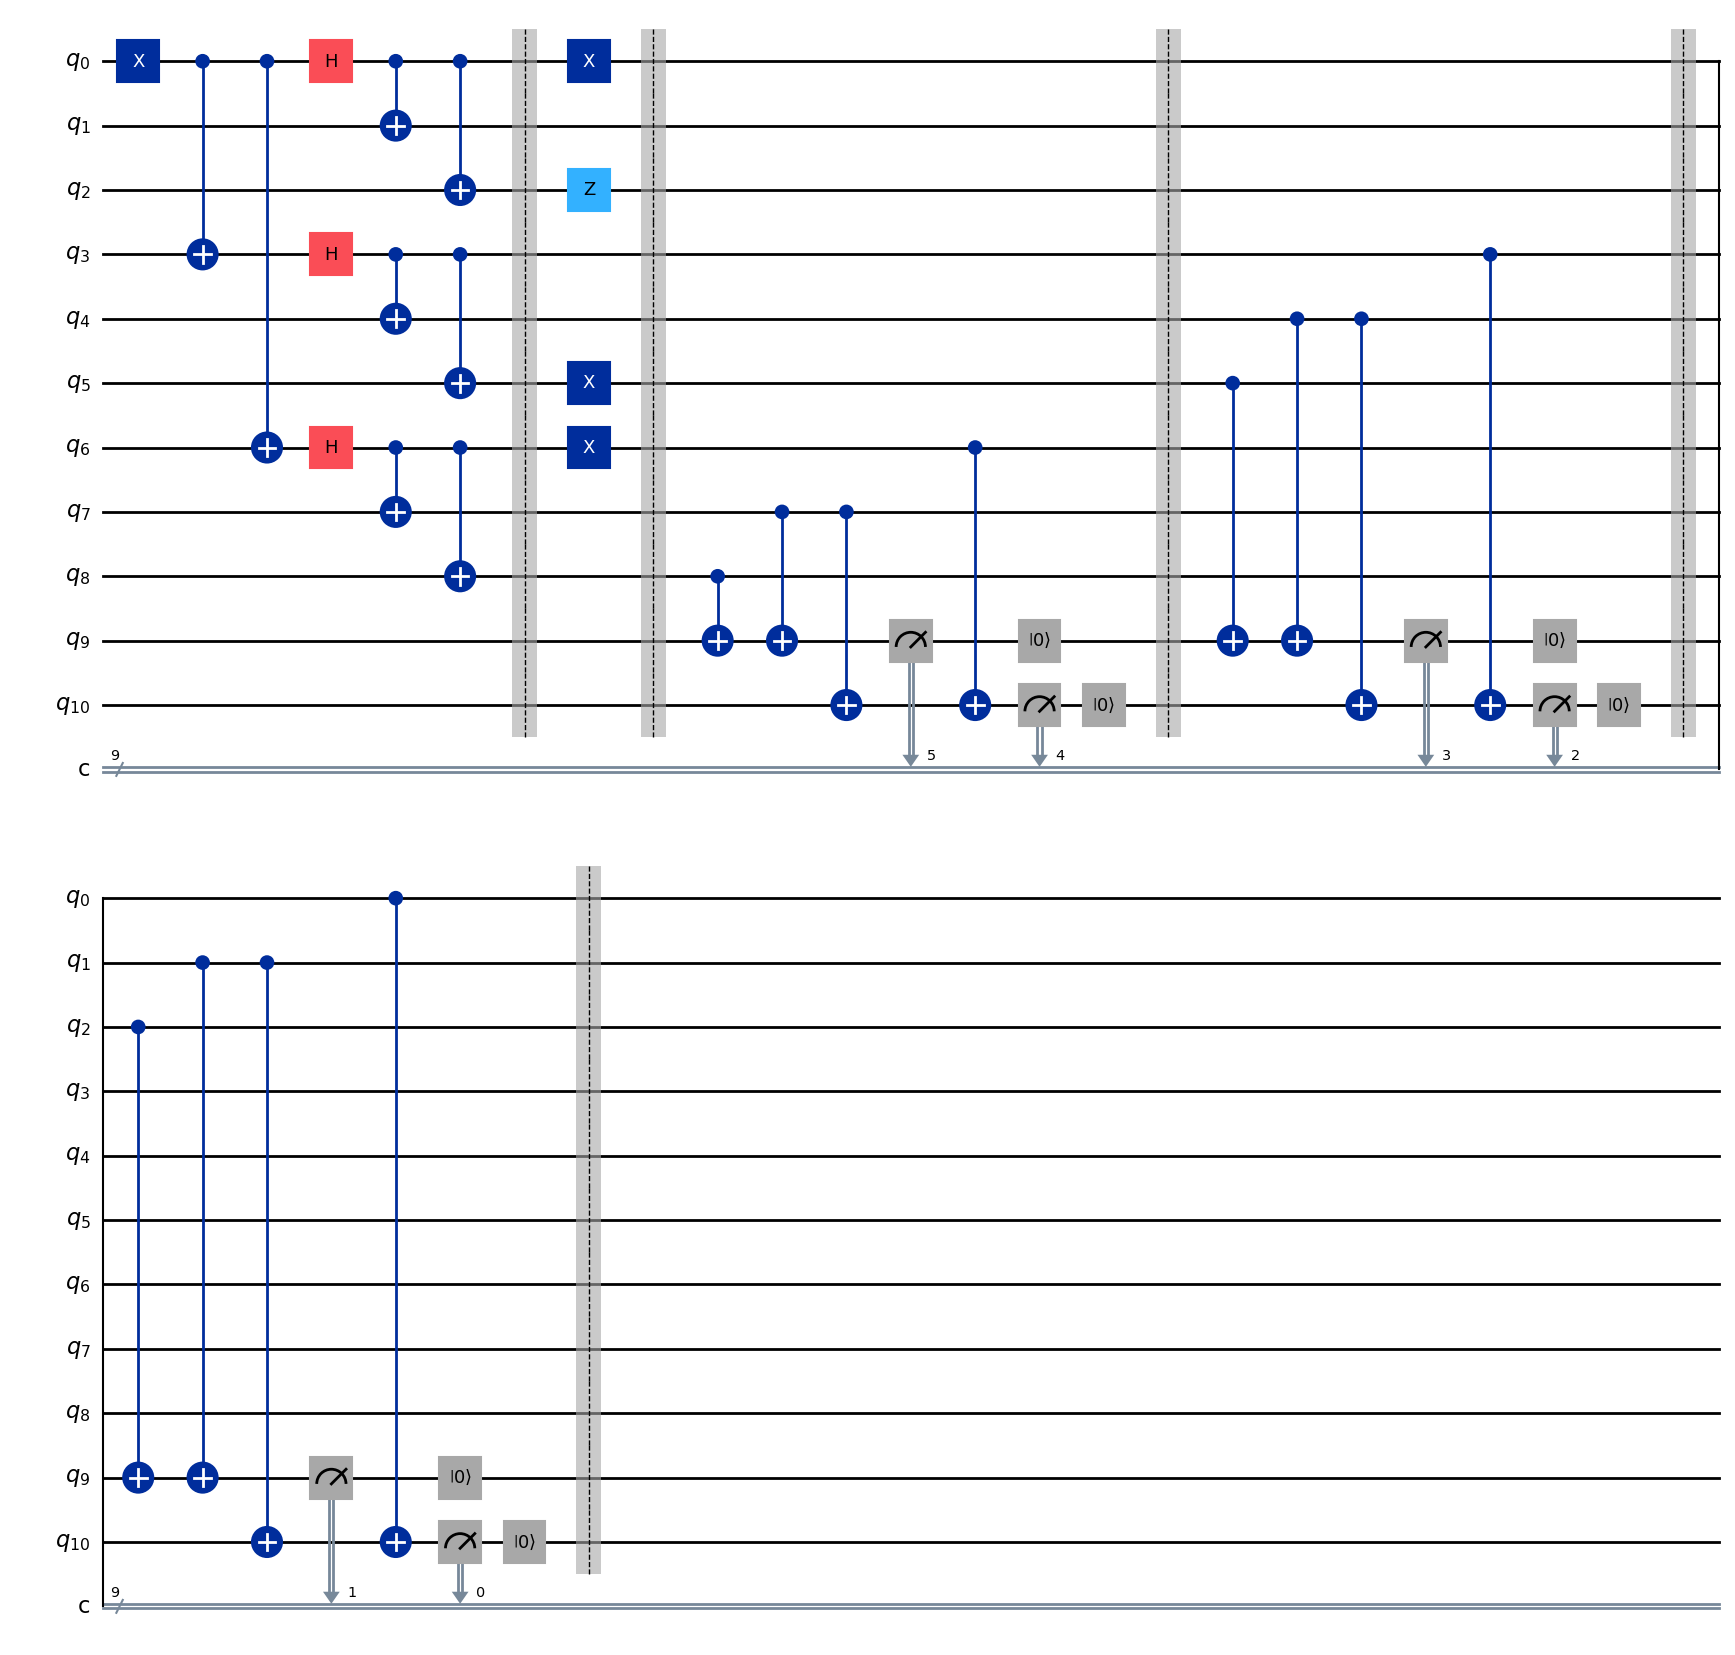

In [ ]:
# Measuring Bit Flip Parity
circuit.cx(q[8],q[9])
circuit.cx(q[7],q[9])
circuit.cx(q[7],q[10])
circuit.cx(q[6],q[10])
circuit.measure(q[9], c[5])
circuit.measure(q[10], c[4])
circuit.reset(q[9])
circuit.reset(q[10])
circuit.barrier()

circuit.cx(q[5],q[9])
circuit.cx(q[4],q[9])
circuit.cx(q[4],q[10])
circuit.cx(q[3],q[10])
circuit.measure(q[9], c[3])
circuit.measure(q[10], c[2])
circuit.reset(q[9])
circuit.reset(q[10])
circuit.barrier()

circuit.cx(q[2],q[9])
circuit.cx(q[1],q[9])
circuit.cx(q[1],q[10])
circuit.cx(q[0],q[10])
circuit.measure(q[9], c[1])
circuit.measure(q[10], c[0])
circuit.reset(q[9])
circuit.reset(q[10])
circuit.barrier()

circuit.draw("mpl")

In [ ]:
# Measuring a state
backend = BasicSimulator()

# If you do not specify the number of shots, the default is 1024
result = backend.run(circuit, shots=1, memory=True).result()

# Extract the counts of 0 and 1 measurements
syndrome = result.get_memory()[0]
print(syndrome)

000011001


QisKit is Little Endian, so the 0th row in the PCM is on the right of the string. As such, the last 6 bits correspond to the parity values for the bit flip, read from right to left.

We will now extract these and perform Belief Propagation.

In [ ]:
import numpy as np
from ldpc.bp_decoder import bp_decoder
# https://pypi.org/project/ldpc/
synArray = []
for i in range(6):
  index = 8-i
  synArray += syndrome[index]
# Convert to ints
synArray = [eval(i) for i in synArray]
# NP Array
syn = np.array(synArray)
H = np.array([[1,1,0,0,0,0,0,0,0],[0,1,1,0,0,0,0,0,0],[0,0,0,1,1,0,0,0,0],[0,0,0,0,1,1,0,0,0],[0,0,0,0,0,0,1,1,0],[0,0,0,0,0,0,0,1,1]])
print("Syndrome:\n {}".format(syn))
print("Parity Check Matrix:\n {}".format(H))

# BP
decoder = bp_decoder(H,error_rate=0.1)
decoder.decode(syn)
decoding = decoder.bp_decoding
print("BP Decoding Probability Ratio Vector:\n {}".format(decoding))

success = decoder.converge
if success:
  print("BP Successfully converged to a solution.")
else:
  print("BP did not converge.")

Syndrome:
 [1 0 0 1 1 0]
Parity Check Matrix:
 [[1 1 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0]
 [0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 1 1]]
BP Decoding Probability Ratio Vector:
 [1 0 0 0 0 1 1 0 0]
BP Successfully converged to a solution.


In [ ]:
def OSD(H, p, s):
    """
    H (np.array): a parity matrix of m x n
    p (np.array): the BP probability vector
    s (np.array): the observed syndrome
    """
    rank = np.flip(np.argsort(p))
    rank_H = min(H.shape[0], H.shape[1])

    Ht = H.transpose()
    new_H = []
    for i, r in enumerate(rank):
        new_H.append(Ht[r])
        if i+1 >= rank_H:
            break
    new_H = np.stack(new_H)
    new_H = new_H.transpose()

    # inverse of H
    inverse_new_H = np.linalg.inv(new_H)
    top_error = np.matmul(inverse_new_H, s)

    # calculate error for corresponding rank
    error = np.zeros((rank.shape[0]))
    for i, r in enumerate(rank):
        error[r] = top_error[i]
        if i+1 >= rank_H:
            break

    return error

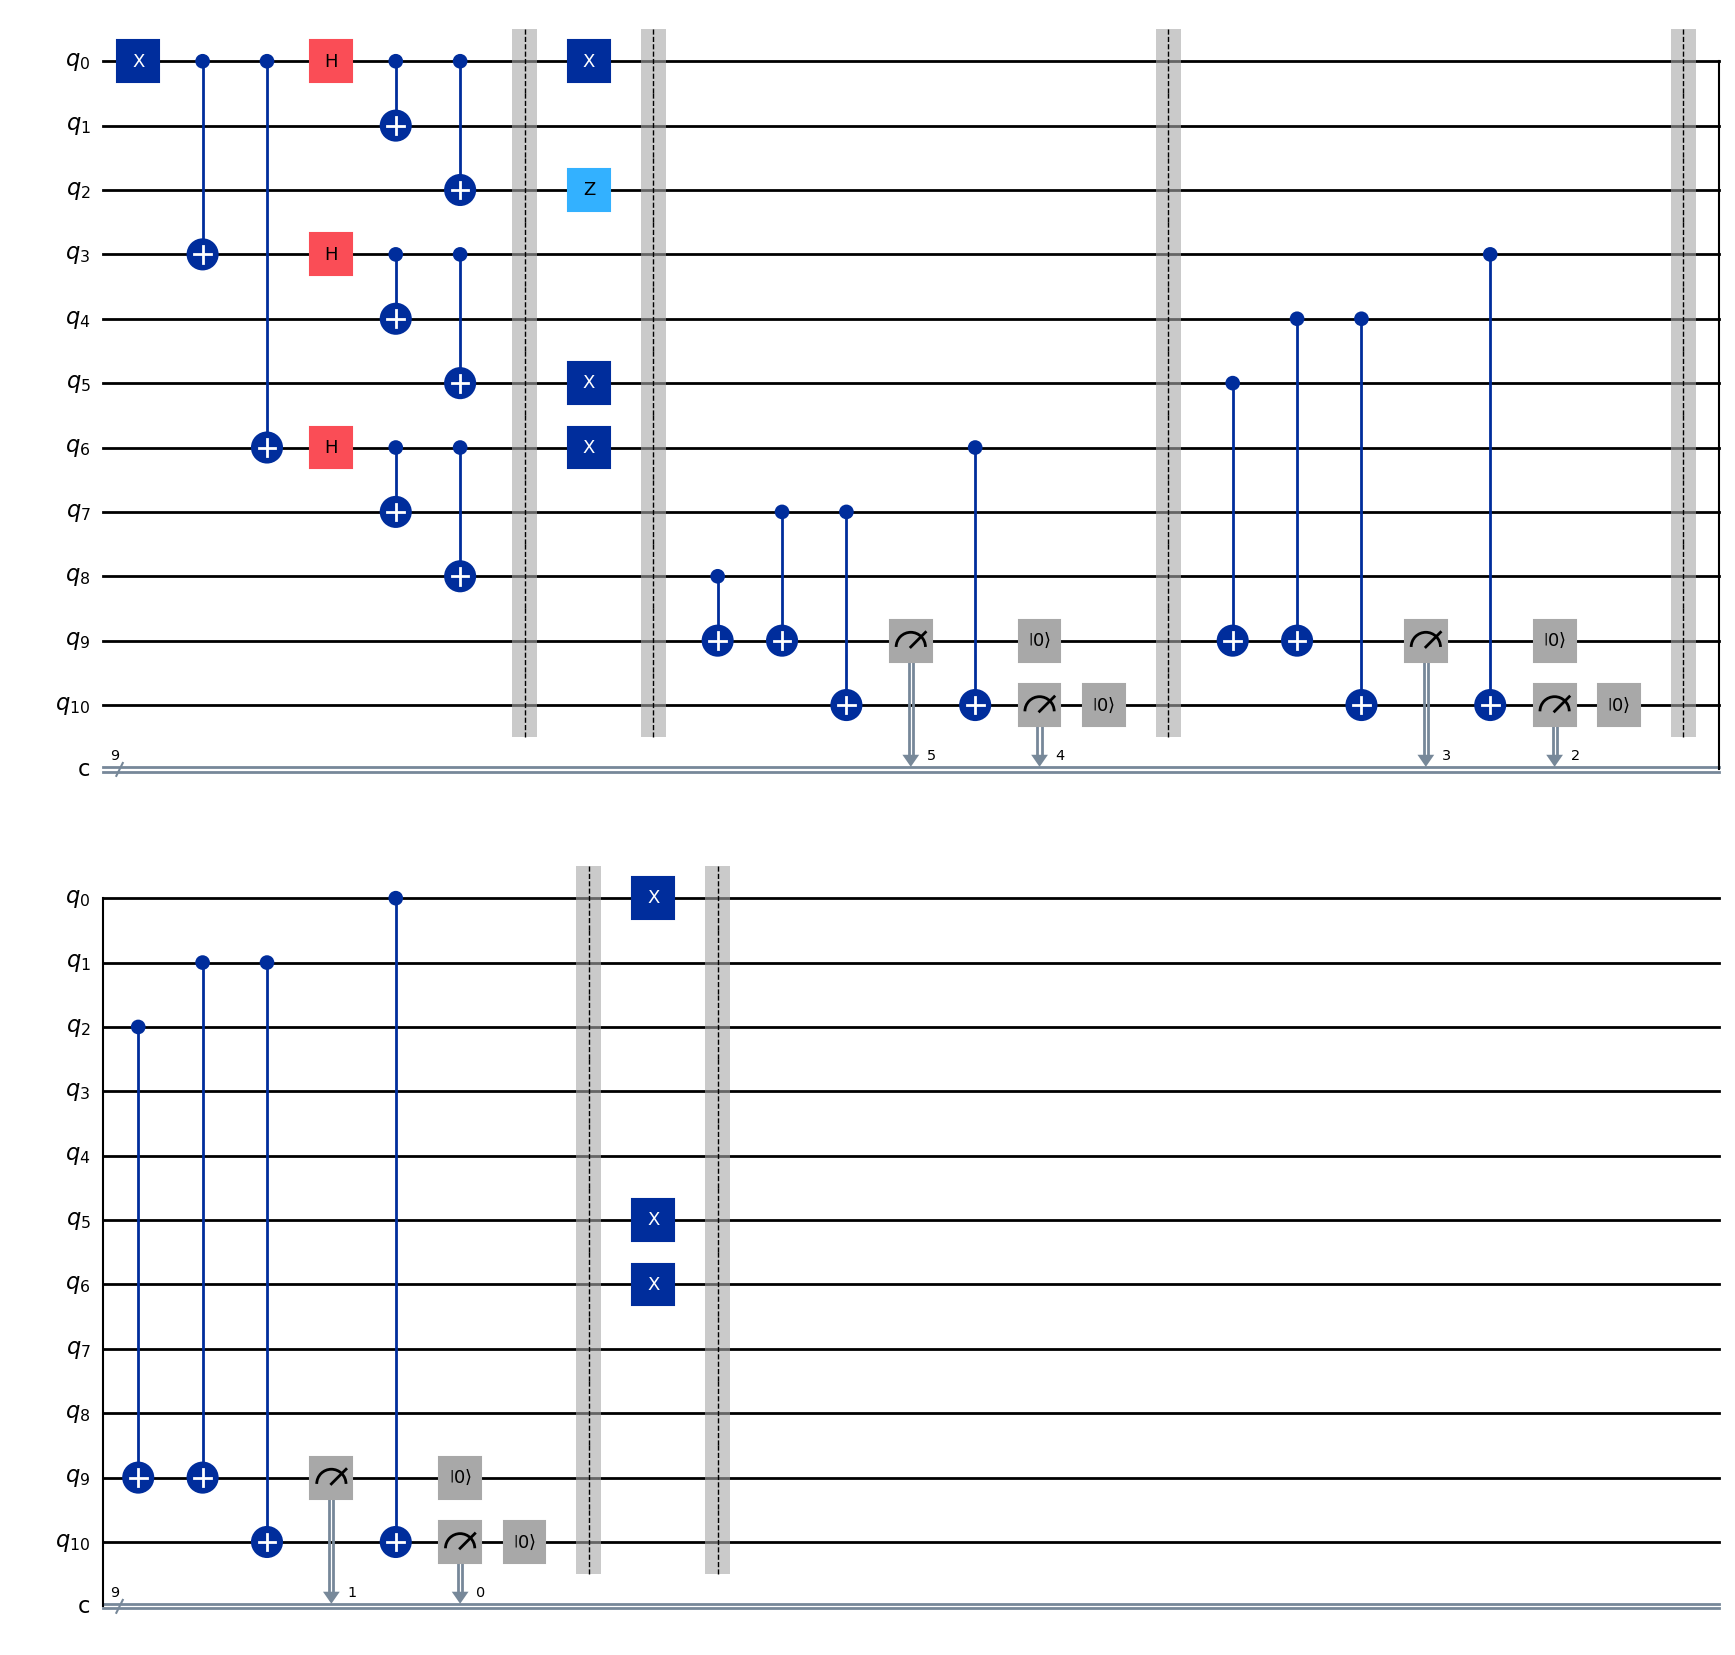

In [ ]:
# If we weren't successful, perform OSD
if not success:
  #TODO: Implement OSD
  decoding = OSD(H,decoding,syn)

# Perform correction outputs on quantum circuit:
for i in range(9):
  if decoding[i]:
    circuit.x(q[i])
circuit.barrier()
circuit.draw("mpl")

As seen above, the BP successfully picked the locations corresponding to bit flip error, and has flipped them back to normal.

We now will perform the same process for phase error, starting with measuing it.

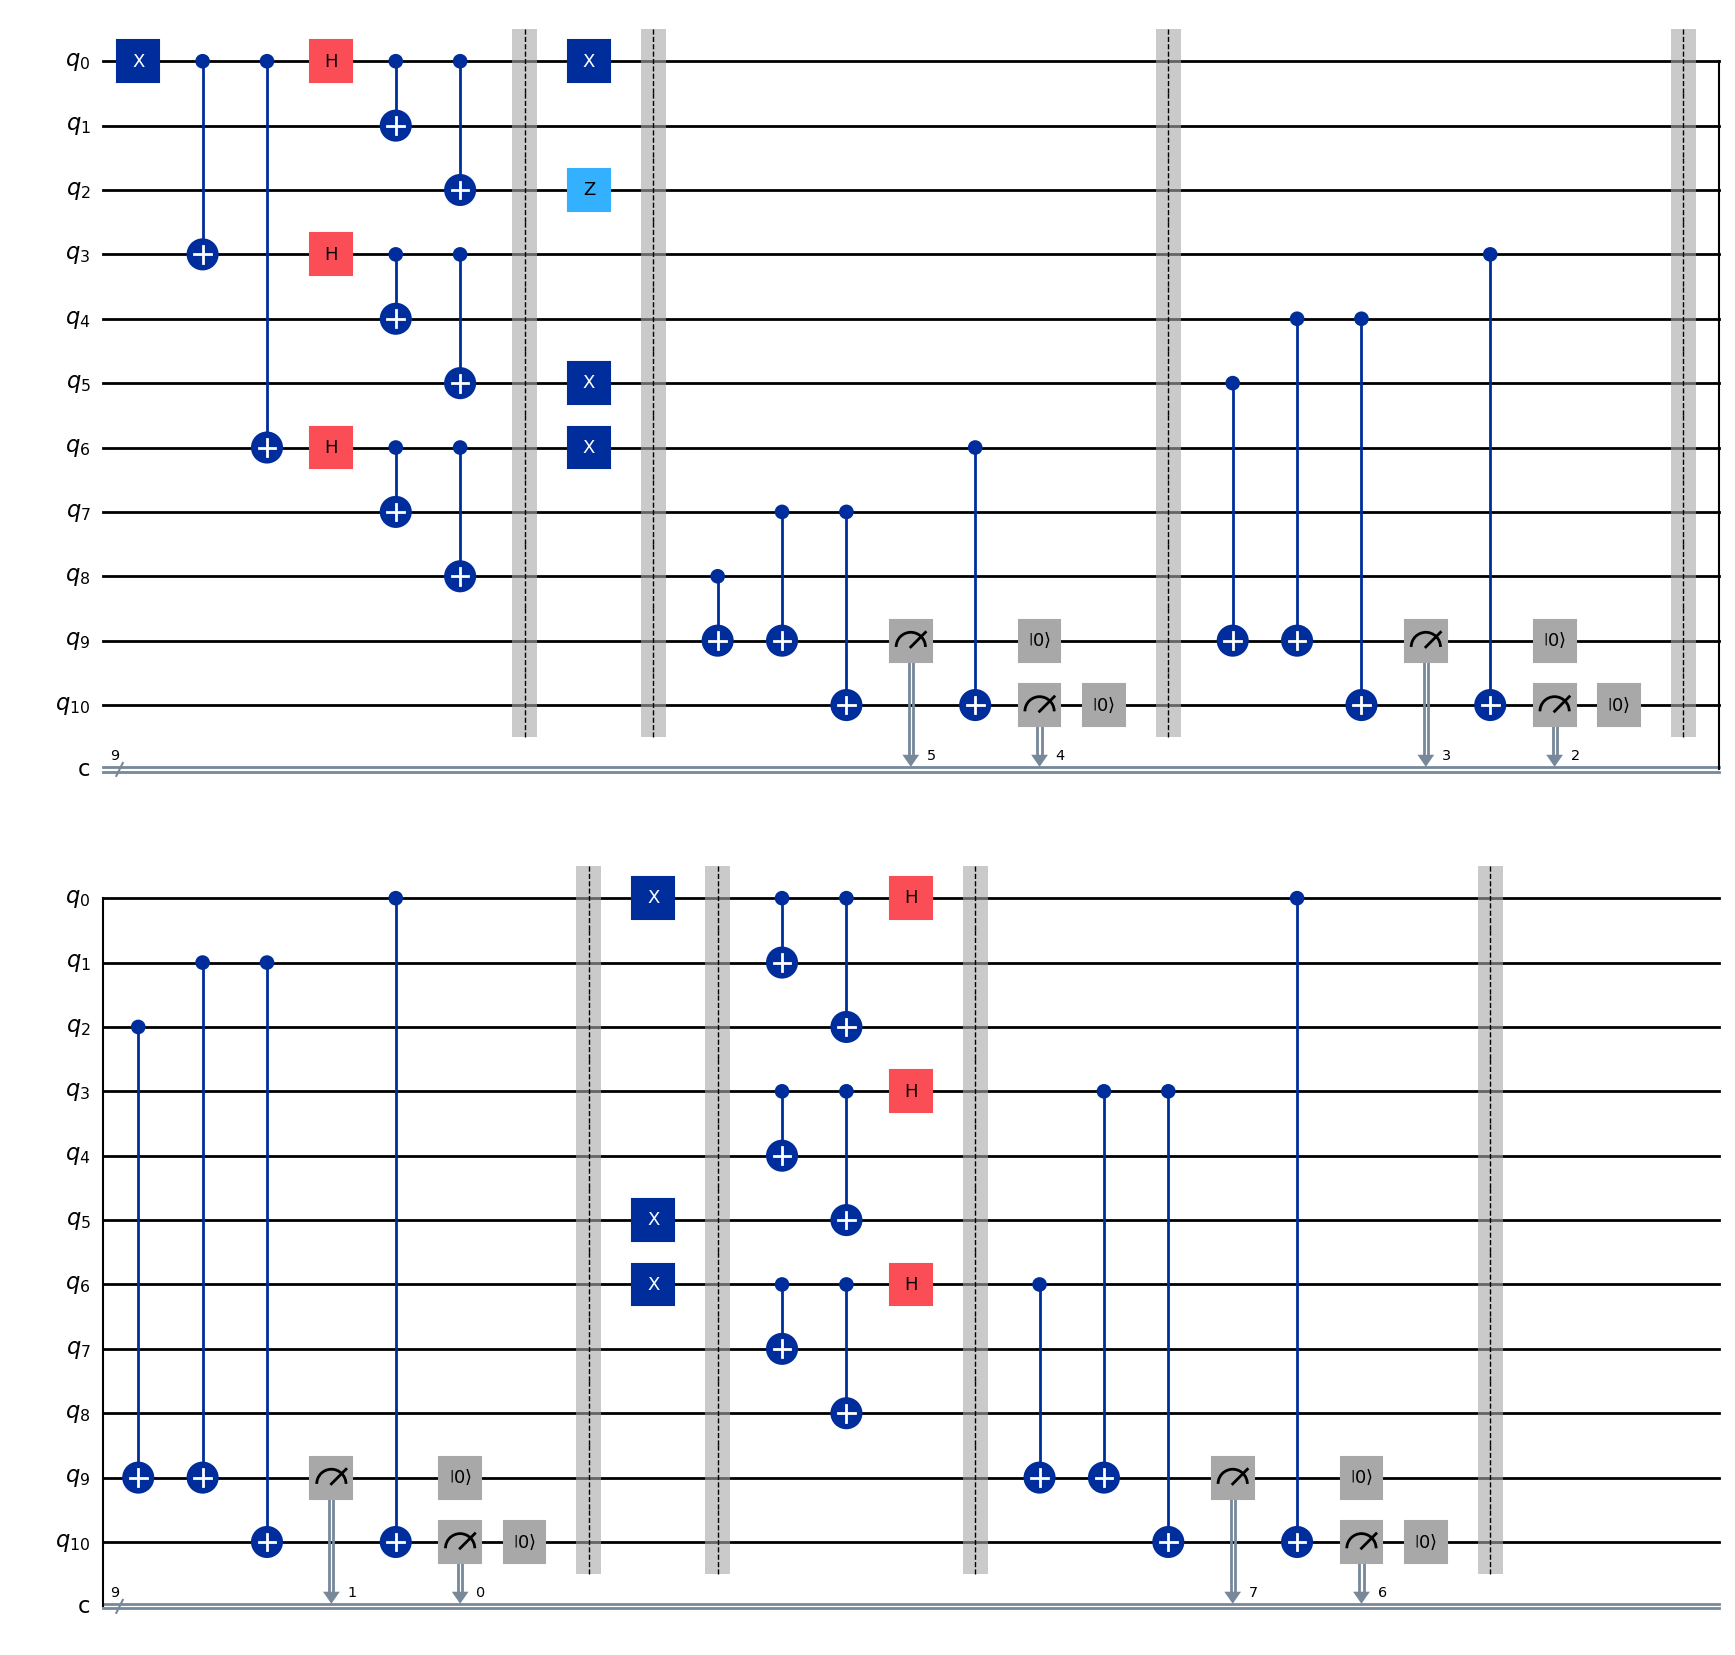

In [ ]:
# Measuring Phase Flip Parity
circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.barrier()

circuit.cx(q[6],q[9])
circuit.cx(q[3],q[9])
circuit.cx(q[3],q[10])
circuit.cx(q[0],q[10])
circuit.measure(q[9], c[7])
circuit.measure(q[10], c[6])
circuit.reset(q[9])
circuit.reset(q[10])
circuit.barrier()

# circuit.h(q[0])
# circuit.h(q[3])
# circuit.h(q[6])

# circuit.cx(q[0],q[1])
# circuit.cx(q[3],q[4])
# circuit.cx(q[6],q[7])

# circuit.cx(q[0],q[2])
# circuit.cx(q[3],q[5])
# circuit.cx(q[6],q[8])

# circuit.barrier()
circuit.draw("mpl")

In [ ]:
# Measuring a state
backend = BasicSimulator()

# If you do not specify the number of shots, the default is 1024
result = backend.run(circuit, shots=1, memory=True).result()

# Extract the counts of 0 and 1 measurements
syndrome = result.get_memory()[0]
print(syndrome)

001011001


In [ ]:
synArray = []
for i in range(2):
  index = 2-i
  synArray += syndrome[index]
# Convert to ints
synArray = [eval(i) for i in synArray]
# NP Array
syn = np.array(synArray)
H = np.array([[1,0,0,1,0,0,0,0,0],[0,0,0,1,0,0,1,0,0]])
print("Syndrome:\n {}".format(syn))
print("Parity Check Matrix:\n {}".format(H))

# BP
decoder = bp_decoder(H,error_rate=0.1)
decoder.decode(syn)
decoding = decoder.bp_decoding
print("BP Decoding Probability Ratio Vector:\n {}".format(decoding))

success = decoder.converge
if success:
  print("BP Successfully converged to a solution.")
else:
  print("BP did not converge.")

Syndrome:
 [1 0]
Parity Check Matrix:
 [[1 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0]]
BP Decoding Probability Ratio Vector:
 [1 0 0 0 0 0 0 0 0]
BP Successfully converged to a solution.


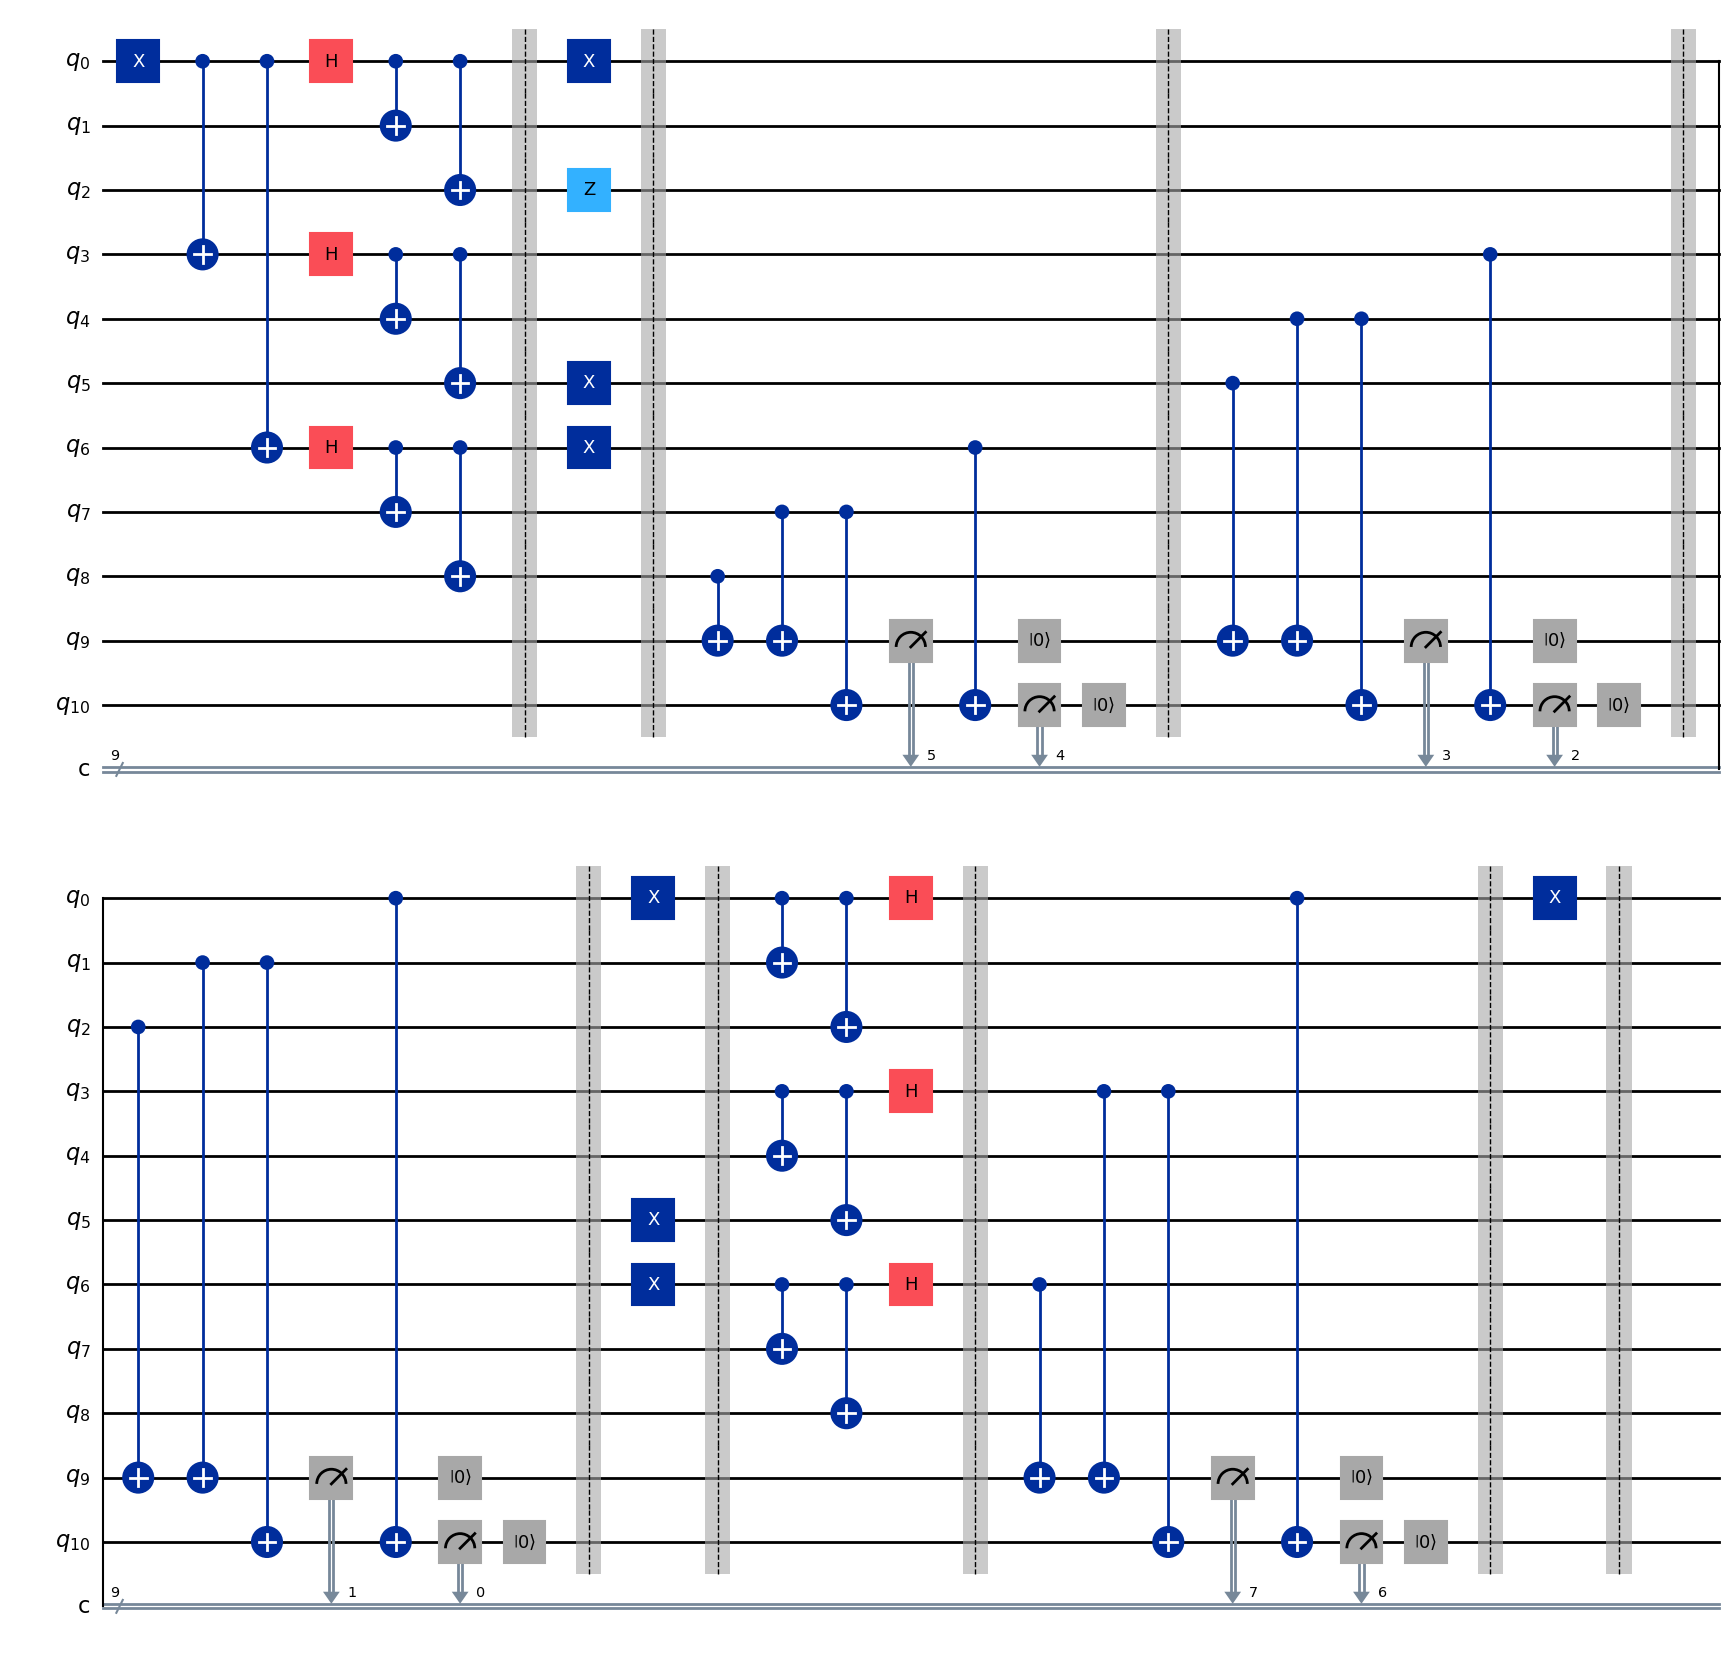

In [ ]:
# If we weren't successful, perform OSD
if not success:
  #TODO: Implement OSD
  decoding = OSD(H,decoding,syn)

# Perform correction outputs on quantum circuit:
for i in range(9):
  if decoding[i]:
    circuit.x(q[i])
circuit.barrier()
circuit.draw("mpl")

Note that this correction makes sense. The phase error occured in the firs triplet, so we need to flip one of these three bits in the X basis, that happening to be q0. Since we ARE in the x basis already, this is a Pauli X gate.

Finally, we will measure results of the full code to see how error has been corrected for:

Note we need to measure the Shor Code in the X Basis, as the state |0> maps to |+++++++++> and |1> maps to |--------->.

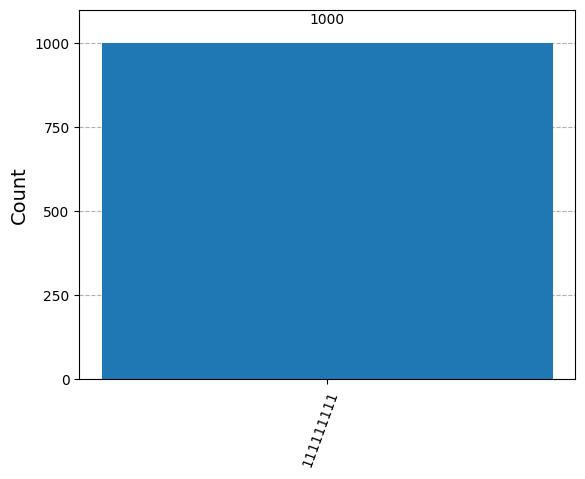

In [ ]:
# Measure Shor Code
for i in range(9):
  circuit.measure(q[0],c[i])

backend = BasicSimulator()

# If you do not specify the number of shots, the default is 1024
result = backend.run(circuit, shots=1000).result()

# Extract the counts of 0 and 1 measurements
counts = result.get_counts()
plot_histogram(counts)

As we see, we have corrected our error to the state 1. Note we are looking at the informational qubit copied to all measuring qubits.

Shor Code does not exhibit any cycles or "trapping sets" in its hamming matrix. As such, OSD will never need to run as BP will converge. If BP fully converges, it will always satisfy the syndrome. As such, we have created some examples of classical codes where BP would not fully converge.

In [ ]:
# Consider the following example
H = np.array([[0,1,0,0,1,0],[0,0,1,0,0,1],[1,0,0,1,0,0],[1,0,0,0,1,1]])
s = np.array([1, 0, 0, 1])

print("Syndrome:\n {}".format(s))
print("Parity Check Matrix:\n {}".format(H))

# BP
decoder = bp_decoder(H,error_rate=0.1,input_vector_type='syndrome')
decoder.decode(s)
decoding = decoder.bp_decoding
print("BP Decoding Probability Ratio Vector:\n {}".format(decoding))

success = decoder.converge
if success:
  print("BP Successfully converged to a solution.\n")
else:
  print("BP did not converge.\n")

# BUT LET"S ASSUME NOW BP GAVE THE FOLLOWING PROBABILITIES:
bp_ex = np.array([.05,.5,.01,.01,.82,.05])
print("Sample unconverged BP vector:\n {}".format(bp_ex))
decoding = OSD(H,bp_ex,s)

print("POST-OSD DECODING:\n {}".format(decoding))
# One can see they are the same, so OSD can help us when our initial calculation does not fully determine a state

Syndrome:
 [1 0 0 1]
Parity Check Matrix:
 [[0 1 0 0 1 0]
 [0 0 1 0 0 1]
 [1 0 0 1 0 0]
 [1 0 0 0 1 1]]
BP Decoding Probability Ratio Vector:
 [0 0 0 0 1 0]
BP Successfully converged to a solution.

Sample unconverged BP vector:
 [0.05 0.5  0.01 0.01 0.82 0.05]
POST-OSD DECODING:
 [0. 0. 0. 0. 1. 0.]


In this QisKit, we have built up the basis for Quantum Error Correction. We introduced several parity measuring circuits and applied them to a Shor Code. We showed three methods of decoding a Shor Code: ranging from if-based classical inputs to the standard example seen in textbooks to using BP+OSD on syndrome measurements for phase and bit errors. We have also shown an example of where OSD will succeed where BP fails, by providing an example BP output that has not fully converged.

We did run into issues while implementing this, specifically with OSD. Certain circular structures of tanner graphs (an example may be 4 qubits where we measure parity of 1,2 then 2,3 then 3,4 then 4,1) we would not be able to solve for a full rank matrix. This is because this matrix is already 4x4 so we can't select a subset of columns to make an invertible matrix. Note the H matrix for this above example is not full rank in its 4x4 state and simply removing columns will make it non-square and thus not invertible either. In future work, we would like to reimplement this function to account for these edge cases. We could have also used the LDPC BP+OSD decoder, like how we used the BP decoder. However, we chose to implement OSD on our own.